In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import json 

In [2]:
orderproducts_old = pd.read_csv('../data-raw/orderproducts.csv', parse_dates=[1,11], infer_datetime_format=True)
orderproducts_old

,order_id,order_created_at,order_total_price,order_status,order_discounts,product_title,product_sku,product_quantity,product_discount,product_category,product_deparments,product_created_at,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,0.00,Electric Guitar Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00,NaN,NaN,NaN
1,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,The Tick™ 2.0 Black,M80-TICK-V2-BLK,1,0.00,Pedals & Pedalboards Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00,NaN,NaN,NaN
2,20570,2018-01-01 17:24:47+00:00,449.97,fulfilled,yes,Pedalboard Lite (Silver),PFX-PB-LT-SLV,1,0.00,Pedalboards,NaN,2017-10-26 02:57:14+00:00,NaN,NaN,NaN
3,20556,2018-01-02 10:56:19+00:00,249.99,fulfilled,yes,Vertigo™ Semi-Hollow,M80-VHB-BLK,1,0.00,Electric Guitar Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00,NaN,NaN,NaN
4,20554,2018-01-02 11:45:26+00:00,NaN,fulfilled,no,The FlyBy,EFX-FLY-BLK,1,229.99,DJ Equipment Cases & Gig Bags,NaN,2017-10-26 02:57:14+00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,400417,2021-04-02 06:03:06+00:00,269.99,fulfilled,yes,"MONO Pedalboard Large, Black and Pro Accessory...",PFX-PB-L-BLK-BDL,1,0.00,Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards",2019-05-12 22:30:50+00:00,1.122760e+12,United States,2019-02-04T14:20:00-08:00
7631,400436,2021-04-02 07:16:47+00:00,219.48,fulfilled,yes,"MONO Classic Tick Accessory Case 2.0, Black",M80-TICK-V2-BLK,1,0.00,Pedals & Pedalboards Cases & Gig Bags,Cases & Gig Bags,2017-10-26 02:57:14+00:00,6.553521e+09,United States,2017-08-02T12:42:03-07:00
7632,400436,2021-04-02 07:16:47+00:00,219.48,fulfilled,yes,"MONO Pedalboard Lite, Black",PFX-PB-LT-BLK,1,0.00,Pedalboards,Pedals & Pedalboards,2017-10-26 02:57:14+00:00,6.553521e+09,United States,2017-08-02T12:42:03-07:00
7633,400451,2021-04-02 09:39:12+00:00,329.99,fulfilled,yes,"MONO Classic Dual Electric Guitar Case, Black",M80-2G-BLK,1,0.00,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26 02:57:14+00:00,5.074620e+12,United States,2021-04-02T10:37:55-07:00


In [3]:
# order_p1 = pd.read_csv('../data/order_p1.csv', parse_dates=[1,11], infer_datetime_format=True)
orderproducts = pd.read_csv('../data-processed/orders_p1.csv')
orderproducts

,id,created_at,closed_at,processed_at,total_price,financial_status,fulfillment_status,refunds,discount_applications,customer.id,customer.created_at,customer.country,line_items.title,line_items.quantity,line_items.sku,line_items.grams,line_items.price,line_items.total_discount,line_items.fulfillment_status,line_items.discount_allocations
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],[],1.494266e+11,2018-01-01T17:23:26-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],[],1.494266e+11,2018-01-01T17:23:26-08:00,United States,The Tick™ 2.0 Black,1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],[],1.494266e+11,2018-01-01T17:23:26-08:00,United States,Pedalboard Lite (Silver),1,PFX-PB-LT-SLV,912,109.99,0.00,fulfilled,[]
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],[],1.503216e+11,2018-01-02T10:55:03-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],"[{""type"":""manual"",""value"":""229.99"",""value_type...",1.503838e+11,2018-01-02T11:45:05-08:00,United States,The FlyBy,1,EFX-FLY-BLK,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],[],1.122758e+12,2019-02-04T14:20:00-08:00,United States,"Pedalboard Large, Black and Pro Accessory Case...",1,PFX-PB-L-BLK-BDL,0,269.99,0.00,fulfilled,[]
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],[],6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Classic Tick Accessory Case 2.0, Black",1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],[],6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Pedalboard Lite, Black",1,PFX-PB-LT-BLK,912,109.99,0.00,fulfilled,[]
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],[],5.074619e+12,2021-04-02T10:37:55-07:00,United States,"Classic Dual Electric Guitar Case, Black",1,M80-2G-BLK,20412,329.99,0.00,fulfilled,[]


In [4]:
orderproducts['discount_applications'] = orderproducts['discount_applications'].apply(lambda x: "yes" if len(json.loads(x)) > 0 else "no")

orderproducts.rename(columns={
    'id': 'order_id', 
    'created_at': 'order_created_at',
    'total_price': 'order_total_price',
    'fulfillment_status': 'order_status',
    'discount_applications': 'order_discounts',
    # '?????': 'product_title',
    'line_items.sku': 'product_sku',
    'line_items.quantity': 'product_quantity',
    'line_items.total_discount': 'product_discount',
    # '?????': 'product_category',
    # '?????': 'product_deparments', # => not in use
    # '?????': 'product_created_at', # => not in use
    'customer.id': 'customer_id',
    'customer.country': 'customer_country',
    'customer.created_at': 'customer_created_at',
}, inplace=True)
orderproducts

,order_id,order_created_at,closed_at,processed_at,order_total_price,financial_status,order_status,refunds,order_discounts,customer_id,customer_created_at,customer_country,line_items.title,product_quantity,product_sku,line_items.grams,line_items.price,product_discount,line_items.fulfillment_status,line_items.discount_allocations
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,2018-01-01T17:23:26-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,2018-01-01T17:23:26-08:00,United States,The Tick™ 2.0 Black,1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,2018-01-01T17:23:26-08:00,United States,Pedalboard Lite (Silver),1,PFX-PB-LT-SLV,912,109.99,0.00,fulfilled,[]
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],no,1.503216e+11,2018-01-02T10:55:03-08:00,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[]
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],yes,1.503838e+11,2018-01-02T11:45:05-08:00,United States,The FlyBy,1,EFX-FLY-BLK,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],no,1.122758e+12,2019-02-04T14:20:00-08:00,United States,"Pedalboard Large, Black and Pro Accessory Case...",1,PFX-PB-L-BLK-BDL,0,269.99,0.00,fulfilled,[]
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Classic Tick Accessory Case 2.0, Black",1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[]
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,2017-08-02T12:42:03-07:00,United States,"Pedalboard Lite, Black",1,PFX-PB-LT-BLK,912,109.99,0.00,fulfilled,[]
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],no,5.074619e+12,2021-04-02T10:37:55-07:00,United States,"Classic Dual Electric Guitar Case, Black",1,M80-2G-BLK,20412,329.99,0.00,fulfilled,[]


In [5]:
# Create date field, remove time details
# orderproducts['order_date'] = [x.date() for x in orderproducts['order_created_at']]  # remove time, display only date
orderproducts['order_date'] = orderproducts['order_created_at'].apply(lambda x: pd.to_datetime((pd.to_datetime(x).date())))# remove time, display only date
# orderproducts['order_date'] = pd.to_datetime(orderproducts['order_date'])
orderproducts

,order_id,order_created_at,closed_at,processed_at,order_total_price,financial_status,order_status,refunds,order_discounts,customer_id,...,customer_country,line_items.title,product_quantity,product_sku,line_items.grams,line_items.price,product_discount,line_items.fulfillment_status,line_items.discount_allocations,order_date
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[],2018-01-01
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,United States,The Tick™ 2.0 Black,1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[],2018-01-01
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,United States,Pedalboard Lite (Silver),1,PFX-PB-LT-SLV,912,109.99,0.00,fulfilled,[],2018-01-01
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],no,1.503216e+11,...,United States,Vertigo™ Semi-Hollow,1,M80-VHB-BLK,20412,249.99,0.00,fulfilled,[],2018-01-02
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],yes,1.503838e+11,...,United States,The FlyBy,1,EFX-FLY-BLK,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in...",2018-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],no,1.122758e+12,...,United States,"Pedalboard Large, Black and Pro Accessory Case...",1,PFX-PB-L-BLK-BDL,0,269.99,0.00,fulfilled,[],2021-04-02
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,United States,"Classic Tick Accessory Case 2.0, Black",1,M80-TICK-V2-BLK,3175,89.99,0.00,fulfilled,[],2021-04-02
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,United States,"Pedalboard Lite, Black",1,PFX-PB-LT-BLK,912,109.99,0.00,fulfilled,[],2021-04-02
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],no,5.074619e+12,...,United States,"Classic Dual Electric Guitar Case, Black",1,M80-2G-BLK,20412,329.99,0.00,fulfilled,[],2021-04-02


In [6]:
# read products information
products = pd.read_csv('../data-raw/products.csv')
# remove duplicated sku names
products = products.drop_duplicates(subset = ['sku'], keep='first')
products = products.set_index('sku')
products

,id,title,price_usd,category,tags,created_at
sku,,,,,,
M80-AD-BLK,33184,"MONO Classic Acoustic/Dreadnought Guitar Case,...",229.99,Acoustic Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-VEG-BLK,33186,"MONO Vertigo Electric Guitar Case, Black",249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-EG-BLK,33187,"MONO Classic Electric Guitar Case, Black",229.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-VEG-GRY,34589,"MONO Vertigo Electric Guitar Case, Grey",249.99,Electric Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
M80-VEB-BLK,34590,"MONO Vertigo Bass Guitar Case, Black",249.99,Bass Guitar Cases & Gig Bags,Cases & Gig Bags,2017-10-26T02:57:14.000Z
...,...,...,...,...,...,...
PFX-PBC-L-SLV-BDL,2667170,MONO Pedalboard Carbon Large and Pro Accessory...,499.99,Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards",2020-01-14T18:48:13.000Z
PFX-PBC-M-SLV-BDL,2667171,MONO Pedalboard Carbon Medium and Tour Accesso...,399.99,Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards",2020-01-14T18:48:13.000Z
PFX-PBC-S-SLV-BDL,2667172,MONO Pedalboard Carbon Small and Club Accessor...,299.99,Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards",2020-01-14T18:48:13.000Z


In [7]:
# Extract the product price for individual item in the list
orderproducts['product_price'] = orderproducts['product_sku'].apply(lambda x: products['price_usd'][x] if x in products.index else 0)
orderproducts['product_title'] = orderproducts['product_sku'].apply(lambda x: products['title'][x] if x in products.index else np.NaN)
orderproducts['product_category'] = orderproducts['product_sku'].apply(lambda x: products['category'][x] if x in products.index else np.NaN)
orderproducts['product_tags'] = orderproducts['product_sku'].apply(lambda x: products['tags'][x] if x in products.index else np.NaN)
orderproducts

,order_id,order_created_at,closed_at,processed_at,order_total_price,financial_status,order_status,refunds,order_discounts,customer_id,...,line_items.grams,line_items.price,product_discount,line_items.fulfillment_status,line_items.discount_allocations,order_date,product_price,product_title,product_category,product_tags
0,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,20412,249.99,0.00,fulfilled,[],2018-01-01,249.99,"MONO Vertigo Semi-Hollow Guitar Case, Black",Electric Guitar Cases & Gig Bags,Cases & Gig Bags
1,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,3175,89.99,0.00,fulfilled,[],2018-01-01,89.99,"MONO Classic Tick Accessory Case 2.0, Black",Pedals & Pedalboards Cases & Gig Bags,Cases & Gig Bags
2,20570,2018-01-01 17:24:47+00:00,2018-01-02T18:02:30.000Z,2018-01-01T17:24:47.000Z,449.97,paid,fulfilled,[],no,1.494266e+11,...,912,109.99,0.00,fulfilled,[],2018-01-01,109.99,"MONO Pedalboard Lite, Silver",Pedalboards,Pedals & Pedalboards
3,20556,2018-01-02 10:56:19+00:00,2018-01-02T18:02:32.000Z,2018-01-02T10:56:19.000Z,249.99,paid,fulfilled,[],no,1.503216e+11,...,20412,249.99,0.00,fulfilled,[],2018-01-02,249.99,"MONO Vertigo Semi-Hollow Guitar Case, Black",Electric Guitar Cases & Gig Bags,Cases & Gig Bags
4,20554,2018-01-02 11:45:26+00:00,2018-01-02T18:02:33.000Z,2018-01-02T11:45:26.000Z,NaN,paid,fulfilled,[],yes,1.503838e+11,...,7257,229.99,229.99,fulfilled,"[{'amount': '229.99', 'discount_application_in...",2018-01-02,229.99,"MONO Classic FlyBy Backpack, Black",DJ Equipment Cases & Gig Bags,Cases & Gig Bags
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02 06:03:06+00:00,2021-04-02T17:02:31.000Z,2021-04-02T06:03:05.000Z,269.99,paid,fulfilled,[],no,1.122758e+12,...,0,269.99,0.00,fulfilled,[],2021-04-02,269.99,"MONO Pedalboard Large, Black and Pro Accessory...",Pedalboards,"Cases & Gig Bags,Pedals & Pedalboards"
7690,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,3175,89.99,0.00,fulfilled,[],2021-04-02,89.99,"MONO Classic Tick Accessory Case 2.0, Black",Pedals & Pedalboards Cases & Gig Bags,Cases & Gig Bags
7691,400436,2021-04-02 07:16:47+00:00,2021-04-02T17:02:33.000Z,2021-04-02T07:16:46.000Z,219.48,paid,fulfilled,[],no,6.553521e+09,...,912,109.99,0.00,fulfilled,[],2021-04-02,109.99,"MONO Pedalboard Lite, Black",Pedalboards,Pedals & Pedalboards
7692,400451,2021-04-02 09:39:12+00:00,2021-04-02T17:02:34.000Z,2021-04-02T09:39:11.000Z,329.99,paid,fulfilled,[],no,5.074619e+12,...,20412,329.99,0.00,fulfilled,[],2021-04-02,329.99,"MONO Classic Dual Electric Guitar Case, Black",Electric Guitar Cases & Gig Bags,Cases & Gig Bags


In [8]:
# # Extract the product price for individual item in the list
# arr, emp = [], []
# for i, row  in orderproducts.iterrows():
#     if row.product_sku in list(products.sku):
#         arr.append(float(products.loc[products['sku'] == row.product_sku, 'price_usd'].values))
#     else:
#         emp.append(row.product_sku)
#         arr.append(0)
# orderproducts['product_price'] = pd.DataFrame(arr)

In [9]:
# list of product skus that is not listed in products.csv
emp = [x for x in orderproducts['product_sku'] if x not in products.index]
print(set(emp))

{nan, 'B-M80-SAD-BLK', 'B-M80-EB-BLK', 'CPN-BAG-STRAP-DPS-BLK', 'SRB-L-BLK', 'STICKER', 'B-M80-AC-BLK', 'B-M80-VEG-GRY', '50-K61-FOAM'}


In [10]:
orderproducts = orderproducts[['order_id', 'order_date', 'order_total_price', 'product_price', 'order_discounts',
                               'product_discount', 'order_status', 'product_title', 'product_sku', 'product_quantity',
                               'product_category']]

In [45]:
product_sku = orderproducts.groupby(['product_sku'])['product_quantity'].agg(['sum']).sort_values('sum', ascending=False).reset_index()
product_sku

,product_sku,sum
0,M80-TICK-V2-BLK,815
1,M80-VEG-BLK,792
2,EFX-FLY-BLK,703
3,M80-EG-BLK,655
4,M80-BTY-BLK-L,616
...,...,...
113,M80-TK1-GRY,1
114,B-M80-AC-BLK,1
115,B-M80-VEG-GRY,1
116,B-M80-SAD-BLK,1


In [12]:
top_20 = list(product_sku['product_sku'].values)[0:20]

In [13]:
top_20

['M80-TICK-V2-BLK',
 'M80-VEG-BLK',
 'EFX-FLY-BLK',
 'M80-EG-BLK',
 'M80-BTY-BLK-L',
 'M80-2G-BLK',
 'M80-VEB-BLK',
 'M80-BTY-BLK-S',
 'M80-EB-BLK',
 'M80-AD-BLK',
 'M80-SEG-BLK',
 'M80-VAD-BLK',
 'M80-SEG-ASH',
 'M80-VHB-BLK',
 'M80-TOUR-V2-BLK',
 'M80-2B-BLK',
 'M80-AC-BLK',
 'M80-VEG-GRY',
 'M80-VEB-GRY',
 'M80-SEB-BLK']

In [14]:
# filter orders where product_sku is in top 20 list
df = orderproducts[orderproducts['product_sku'].isin(top_20)]

In [15]:
df.to_csv('../data-processed/orderproducts_top20.csv', index=False)

##### Plotting across months for the top 20 product skus

In [16]:
df.set_index('order_date', inplace=True)
prod_monthly = pd.crosstab(df.index, df['product_sku']).resample('M').sum()
x_labels = list(prod_monthly.index.strftime('%Y-%m').values)

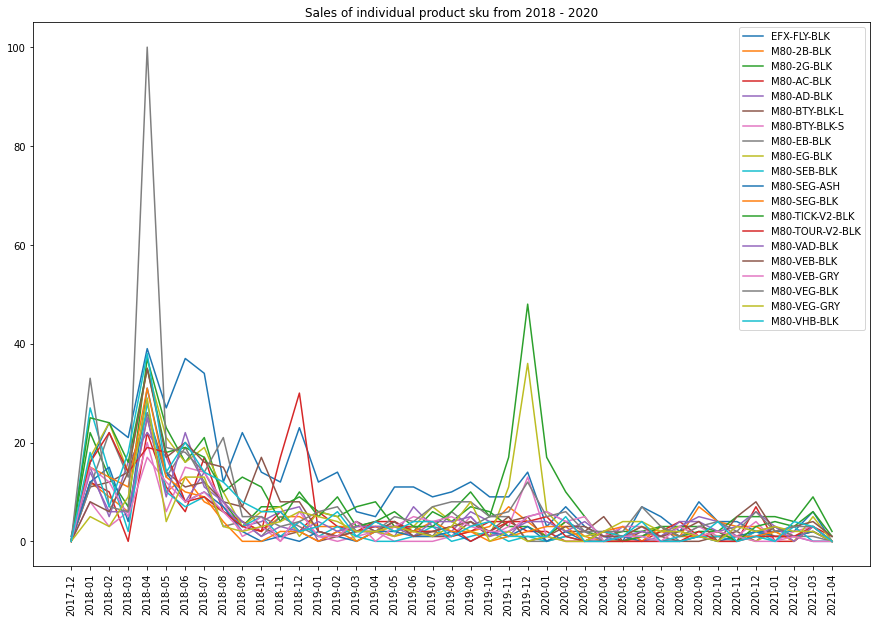

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
for prod in list(prod_monthly.columns):
    plt.plot(x_labels, prod_monthly[prod], label=prod)
plt.title('Sales of individual product sku from 2018 - 2020')
plt.xticks(np.arange(len(x_labels)),x_labels, rotation=90)
plt.legend(loc='upper right')
plt.show()

In [18]:
prod_yearly = pd.crosstab(df.index, df['product_sku']).resample('Y').sum()

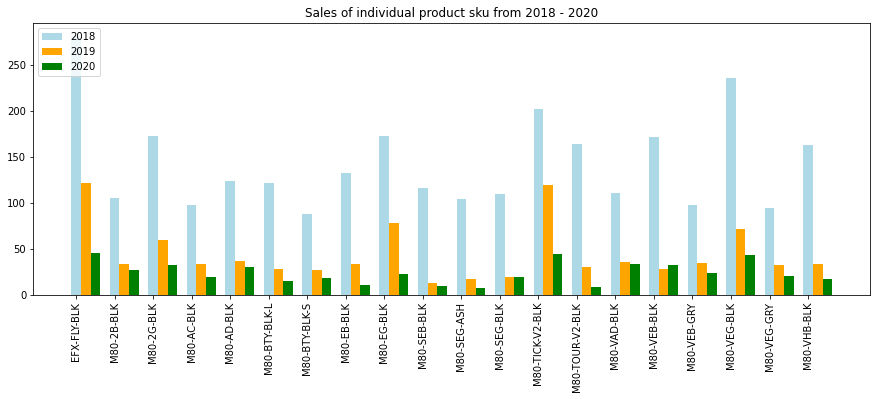

In [19]:
plt.figure(figsize=(15,5))
y_pos = np.arange(len(prod_yearly.columns))
plt.bar(y_pos+0,    prod_yearly.iloc[1,:].values, width=0.25, color = 'lightblue')
plt.bar(y_pos+0.25, prod_yearly.iloc[2,:].values, width=0.25, color = 'orange')
plt.bar(y_pos+0.50, prod_yearly.iloc[3,:].values, width=0.25, color = 'green')
plt.legend(["2018", "2019", "2020"], loc="upper left")
plt.title('Sales of individual product sku from 2018 - 2020')
plt.xticks(y_pos, prod_yearly.columns)
plt.xticks(rotation=90)
plt.show()

In [20]:
now = pd.to_datetime('now')

last5 = now - pd.DateOffset(months=5)

orderproducts_last5 = orderproducts.query("(@now >= order_date >= @last5)")
# orderproducts_last5

product_sku_last_5months = orderproducts_last5.groupby(['product_sku'])['product_quantity'].agg(['sum']).sort_values('sum', ascending=False).reset_index()
product_sku_last_5months

,product_sku,sum
0,M80-FLY-ULT-BLK,47
1,M80-2G-BLK,28
2,M80-VEB-BLK,22
3,M80-TICK-V2-BLK,17
4,EFX-FLY-BLK,16
...,...,...
73,M80-K61-BLK,1
74,M80-DLT-GRY,1
75,CVL-LLT-17-BLK,1
76,CVL-LLT-13-WHT,1


In [21]:
top_20_last5 = list(product_sku_last_5months['product_sku'].values)[0:20]
df_last5 = orderproducts[orderproducts['product_sku'].isin(top_20_last5)]

df_last5.set_index('order_date', inplace=True)
prod_monthly_last5 = pd.crosstab(df_last5.index, df_last5['product_sku']).resample('M').sum()
x_labels_last5 = list(prod_monthly_last5.index.strftime('%Y-%m').values)

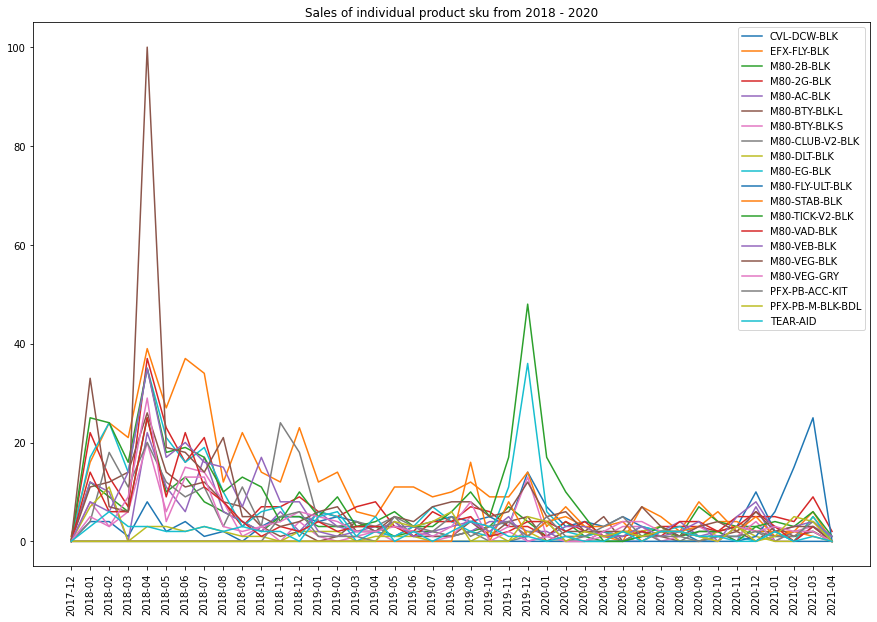

In [22]:
plt.figure(figsize=(15,10))
for prod in list(prod_monthly_last5.columns):
    plt.plot(x_labels_last5, prod_monthly_last5[prod], label=prod)
plt.title('Sales of individual product sku from 2018 - 2020')
plt.xticks(np.arange(len(x_labels_last5)),x_labels_last5, rotation=90)
plt.legend(loc='upper right')
plt.show()

In [23]:
len(set(top_20_last5) - set(top_20))

8

In [24]:
set(top_20_last5) - set(top_20)

{'CVL-DCW-BLK',
 'M80-CLUB-V2-BLK',
 'M80-DLT-BLK',
 'M80-FLY-ULT-BLK',
 'M80-STAB-BLK',
 'PFX-PB-ACC-KIT',
 'PFX-PB-M-BLK-BDL',
 'TEAR-AID'}

In [53]:
small_price = 50
orderproducts_small_price = orderproducts.query("(product_price <= @small_price)")
orderproducts_small_price

,order_id,order_date,order_total_price,product_price,order_discounts,product_discount,order_status,product_title,product_sku,product_quantity,product_category
8,20574,2018-01-01,69.56,49.99,no,0.00,fulfilled,"MONO Die Cut Wallet, Black",CVL-DCW-BLK,1,Gifts
9,20557,2018-01-02,63.91,49.99,no,0.00,fulfilled,"MONO Loop Laptop Sleeve 13"", Black",CVL-LLT-13-BLK,1,Gifts
14,20545,2018-01-03,NaN,39.99,yes,39.99,fulfilled,"MONO Warsaw Guitar Strap, Manta Black",M80-WAR-BLK,1,Guitar Straps
19,20542,2018-01-03,NaN,0.01,no,0.00,fulfilled,MONO Tick Extender Black,TEX-BLK,3,Spareparts
20,20537,2018-01-03,NaN,0.00,no,0.00,fulfilled,NaN,STICKER,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7660,395992,2021-03-28,134.97,39.99,no,0.00,fulfilled,"MONO Warsaw Guitar Strap, Manta Black",M80-WAR-BLK,3,Guitar Straps
7661,396002,2021-03-28,54.99,39.99,no,0.00,fulfilled,"MONO Doolittle Guitar Strap, True Black",M80-DLT-BLK,1,Guitar Straps
7667,397234,2021-03-29,249.98,29.99,no,0.00,fulfilled,"MONO Pedalboard Accessories Kit, Black",PFX-PB-ACC-KIT,1,Pedalboards
7668,397255,2021-03-29,68.61,49.99,no,0.00,fulfilled,"MONO Betty Guitar Strap, Long, Black",M80-BTY-BLK-L,1,Guitar Straps


In [55]:
small_price = 30
orderproducts_small_price = orderproducts.query("(product_price <= @small_price)")
orderproducts_small_price

,order_id,order_date,order_total_price,product_price,order_discounts,product_discount,order_status,product_title,product_sku,product_quantity,product_category
19,20542,2018-01-03,NaN,0.01,no,0.0,fulfilled,MONO Tick Extender Black,TEX-BLK,3,Spareparts
20,20537,2018-01-03,NaN,0.00,no,0.0,fulfilled,NaN,STICKER,5,NaN
31,20511,2018-01-07,NaN,0.00,no,0.0,fulfilled,NaN,SRB-L-BLK,1,NaN
59,22663,2018-01-15,NaN,0.01,no,0.0,fulfilled,MONO M80 Tour Tag,M80-TT-BLK,3,Gifts
73,22627,2018-01-18,NaN,0.01,no,0.0,fulfilled,MONO Tear-Aid Fabric Repair Kit,TEAR-AID,1,Spareparts
...,...,...,...,...,...,...,...,...,...,...,...
7566,380849,2021-03-08,0.02,0.01,no,0.0,fulfilled,MONO Tear-Aid Fabric Repair Kit,TEAR-AID,2,Spareparts
7594,386421,2021-03-15,47.16,29.99,no,0.0,fulfilled,"MONO Pedalboard Accessories Kit, Black",PFX-PB-ACC-KIT,1,Pedalboards
7633,393040,2021-03-24,328.48,29.99,no,0.0,fulfilled,"MONO Pedalboard Accessories Kit, Black",PFX-PB-ACC-KIT,1,Pedalboards
7640,393925,2021-03-25,246.66,0.00,no,0.0,NaN,NaN,NaN,1,NaN


In [39]:
def df_get_top_list (df, top, filtered_df=None, info=True, agg_field='product_quantity', id_field='product_sku', time_field='order_date'):
    filtered_df = df if filtered_df is None else filtered_df
    df_index_field_n_aggregate_field = filtered_df.groupby([id_field])[agg_field].agg(['sum']).sort_values('sum', ascending=False).reset_index()
    if info:
        print(df_index_field_n_aggregate_field.head())
    top_data = list(df_index_field_n_aggregate_field[id_field].values)[0:top]
    return top_data

def df_get_top(df, top, filtered_df=None, info=True, agg_field='product_quantity', id_field='product_sku', time_field='order_date'):
    top_data = df_get_top_list(df, top, filtered_df, info, agg_field, id_field, time_field)
    new_df = df[df[id_field].isin(top_data)]

    new_df.set_index(time_field, inplace=True)
    df_monthly = pd.crosstab(new_df.index, new_df[id_field]).resample('M').sum()
    x_labels = list(df_monthly.index.strftime('%Y-%m').values)
    
    if info:
        plt.figure(figsize=(15,10))
        for prod in list(df_monthly.columns):
            plt.plot(x_labels, df_monthly[prod], label=prod)
        plt.title('Sales of individual ' + id_field + ' from 2018 - 2020')
        plt.xticks(np.arange(len(x_labels)),x_labels, rotation=90)
        plt.legend(loc='upper right')
        plt.show()
    return new_df

      product_sku  sum
0        TEAR-AID  188
1  PFX-PB-ACC-KIT   74
2       WCS-M-BLK   64
3      M80-TT-BLK   31
4    PFX-PB-R-BLK   11


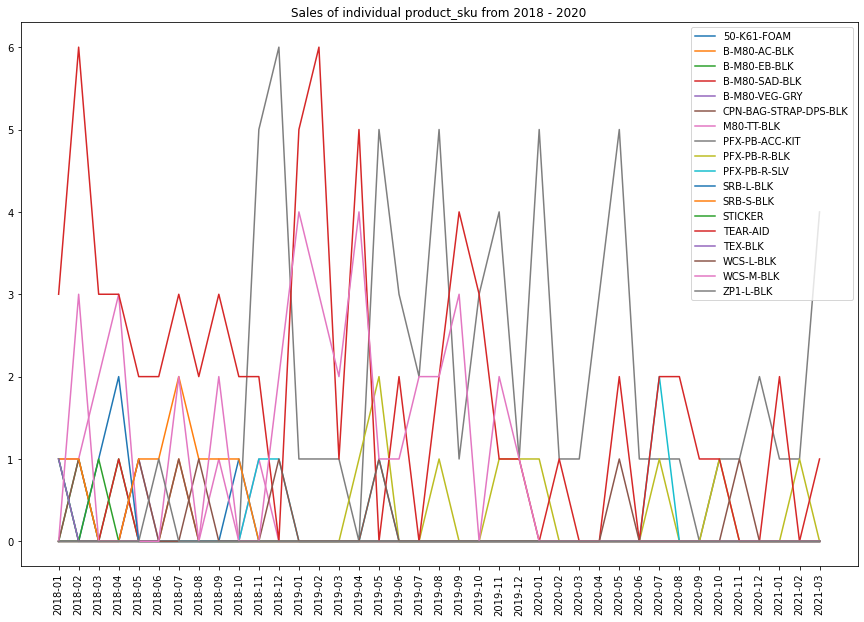

,order_id,order_total_price,product_price,order_discounts,product_discount,order_status,product_title,product_sku,product_quantity,product_category
order_date,,,,,,,,,,
2018-01-03,20542,NaN,0.01,no,0.0,fulfilled,MONO Tick Extender Black,TEX-BLK,3,Spareparts
2018-01-03,20537,NaN,0.00,no,0.0,fulfilled,NaN,STICKER,5,NaN
2018-01-07,20511,NaN,0.00,no,0.0,fulfilled,NaN,SRB-L-BLK,1,NaN
2018-01-15,22663,NaN,0.01,no,0.0,fulfilled,MONO M80 Tour Tag,M80-TT-BLK,3,Gifts
2018-01-18,22627,NaN,0.01,no,0.0,fulfilled,MONO Tear-Aid Fabric Repair Kit,TEAR-AID,1,Spareparts
...,...,...,...,...,...,...,...,...,...,...
2021-03-09,381592,328.48,29.99,no,0.0,fulfilled,"MONO Pedalboard Accessories Kit, Black",PFX-PB-ACC-KIT,1,Pedalboards
2021-03-08,380849,0.02,0.01,no,0.0,fulfilled,MONO Tear-Aid Fabric Repair Kit,TEAR-AID,2,Spareparts
2021-03-15,386421,47.16,29.99,no,0.0,fulfilled,"MONO Pedalboard Accessories Kit, Black",PFX-PB-ACC-KIT,1,Pedalboards


In [33]:
small_price = 30
orderproducts_small_price = orderproducts.query("(product_price <= @small_price)")
# orderproducts_small_price

df_get_top(orderproducts_small_price, 20) 

In [50]:
small_price = 30
orderproducts_small_price = orderproducts.query("(product_price <= @small_price)")

len(set(df_get_top_list(orderproducts, 20, info=False)) - set(df_get_top_list(orderproducts, 20, filtered_df=orderproducts_small_price, info=False)))

20

In [51]:
small_price = 40
orderproducts_small_price = orderproducts.query("(product_price <= @small_price)")

len(set(df_get_top_list(orderproducts, 20, info=False)) - set(df_get_top_list(orderproducts, 20, filtered_df=orderproducts_small_price, info=False)))

20

In [52]:
small_price = 50
orderproducts_small_price = orderproducts.query("(product_price <= @small_price)")

len(set(df_get_top_list(orderproducts, 20, info=False)) - set(df_get_top_list(orderproducts, 20, filtered_df=orderproducts_small_price, info=False)))

18

In [60]:
orderproducts['order_product_total_price'] = orderproducts['product_price'] * orderproducts['product_quantity']
orderproducts

<ipython-input-60-bb1e954e8d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderproducts['order_product_total_price'] = orderproducts['product_price'] * orderproducts['product_quantity']


,order_id,order_date,order_total_price,product_price,order_discounts,product_discount,order_status,product_title,product_sku,product_quantity,product_category,order_product_total_price
0,20570,2018-01-01,449.97,249.99,no,0.00,fulfilled,"MONO Vertigo Semi-Hollow Guitar Case, Black",M80-VHB-BLK,1,Electric Guitar Cases & Gig Bags,249.99
1,20570,2018-01-01,449.97,89.99,no,0.00,fulfilled,"MONO Classic Tick Accessory Case 2.0, Black",M80-TICK-V2-BLK,1,Pedals & Pedalboards Cases & Gig Bags,89.99
2,20570,2018-01-01,449.97,109.99,no,0.00,fulfilled,"MONO Pedalboard Lite, Silver",PFX-PB-LT-SLV,1,Pedalboards,109.99
3,20556,2018-01-02,249.99,249.99,no,0.00,fulfilled,"MONO Vertigo Semi-Hollow Guitar Case, Black",M80-VHB-BLK,1,Electric Guitar Cases & Gig Bags,249.99
4,20554,2018-01-02,NaN,229.99,yes,229.99,fulfilled,"MONO Classic FlyBy Backpack, Black",EFX-FLY-BLK,1,DJ Equipment Cases & Gig Bags,229.99
...,...,...,...,...,...,...,...,...,...,...,...,...
7689,400417,2021-04-02,269.99,269.99,no,0.00,fulfilled,"MONO Pedalboard Large, Black and Pro Accessory...",PFX-PB-L-BLK-BDL,1,Pedalboards,269.99
7690,400436,2021-04-02,219.48,89.99,no,0.00,fulfilled,"MONO Classic Tick Accessory Case 2.0, Black",M80-TICK-V2-BLK,1,Pedals & Pedalboards Cases & Gig Bags,89.99
7691,400436,2021-04-02,219.48,109.99,no,0.00,fulfilled,"MONO Pedalboard Lite, Black",PFX-PB-LT-BLK,1,Pedalboards,109.99
7692,400451,2021-04-02,329.99,329.99,no,0.00,fulfilled,"MONO Classic Dual Electric Guitar Case, Black",M80-2G-BLK,1,Electric Guitar Cases & Gig Bags,329.99


In [62]:
len(set(df_get_top_list(orderproducts, 20, info=False)) - set(df_get_top_list(orderproducts, 20, info=False, agg_field='order_product_total_price')))

2

   product_sku        sum
0  M80-VEG-BLK  197992.08
1   M80-2G-BLK  194694.10
2  EFX-FLY-BLK  161682.97
3   M80-EG-BLK  150643.45
4  M80-VEB-BLK  138494.46


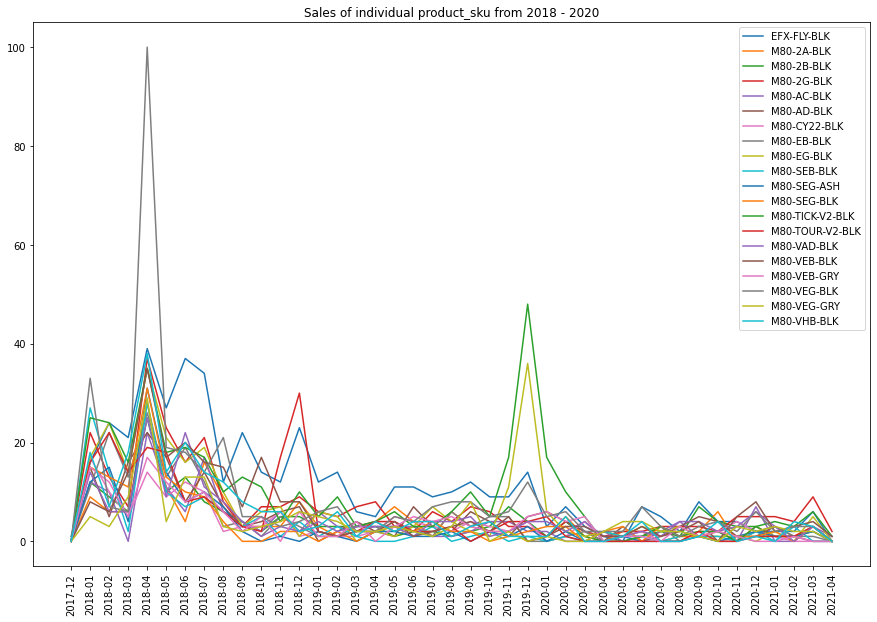

In [63]:
orderproducts_total_price = df_get_top(orderproducts, 20, agg_field='order_product_total_price').to_csv('../data-processed/orderproducts_top20_total_price.csv', index=False)
orderproducts_total_price

In [66]:
now = pd.to_datetime('now')

last5 = now - pd.DateOffset(months=5)

orderproducts_last5 = orderproducts.query("(@now >= order_date >= @last5)")

len(set(df_get_top_list(orderproducts, 20, filtered_df=orderproducts_last5, info=False, agg_field='order_product_total_price')) - set(df_get_top_list(orderproducts, 20, info=False, agg_field='order_product_total_price')))

7

       product_sku       sum
0  M80-FLY-ULT-BLK  14099.53
1       M80-2G-BLK   9239.72
2      M80-VEB-BLK   5499.78
3      M80-VEG-BLK   3749.85
4      EFX-FLY-BLK   3679.84


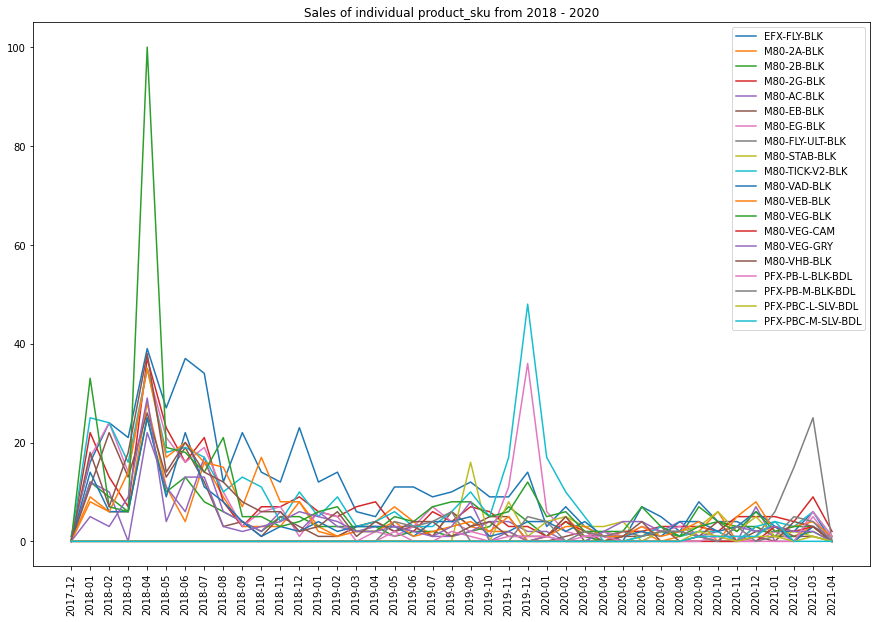

,order_id,order_total_price,product_price,order_discounts,product_discount,order_status,product_title,product_sku,product_quantity,product_category,order_product_total_price
order_date,,,,,,,,,,,
2018-01-01,20570,449.97,249.99,no,0.00,fulfilled,"MONO Vertigo Semi-Hollow Guitar Case, Black",M80-VHB-BLK,1,Electric Guitar Cases & Gig Bags,249.99
2018-01-01,20570,449.97,89.99,no,0.00,fulfilled,"MONO Classic Tick Accessory Case 2.0, Black",M80-TICK-V2-BLK,1,Pedals & Pedalboards Cases & Gig Bags,89.99
2018-01-02,20556,249.99,249.99,no,0.00,fulfilled,"MONO Vertigo Semi-Hollow Guitar Case, Black",M80-VHB-BLK,1,Electric Guitar Cases & Gig Bags,249.99
2018-01-02,20554,NaN,229.99,yes,229.99,fulfilled,"MONO Classic FlyBy Backpack, Black",EFX-FLY-BLK,1,DJ Equipment Cases & Gig Bags,229.99
2018-01-01,20573,249.99,249.99,no,0.00,fulfilled,"MONO Vertigo Electric Guitar Case, Black",M80-VEG-BLK,1,Electric Guitar Cases & Gig Bags,249.99
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,399691,246.66,229.99,no,0.00,fulfilled,"MONO Classic OM/Classical Guitar Case, Black",M80-AC-BLK,1,Acoustic Guitar Cases & Gig Bags,229.99
2021-04-02,400417,269.99,269.99,no,0.00,fulfilled,"MONO Pedalboard Large, Black and Pro Accessory...",PFX-PB-L-BLK-BDL,1,Pedalboards,269.99
2021-04-02,400436,219.48,89.99,no,0.00,fulfilled,"MONO Classic Tick Accessory Case 2.0, Black",M80-TICK-V2-BLK,1,Pedals & Pedalboards Cases & Gig Bags,89.99


In [69]:
df_get_top(orderproducts, 20, filtered_df=orderproducts_last5, agg_field='order_product_total_price')